# Christina Kong Week 6 Homework

## Step 1: Load the Dataset

In [ ]:
# Importing neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Loading the Titanic dataset into a pandas DataFrame called titanic_df
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_df = pd.read_csv(url)

In [ ]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Displays the number of entries and columns
titanic_df.shape

(891, 12)

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Step 2: Data Cleaning and Preprocessing

### Checking and Handling Missing Values

In [ ]:
# Handling missing values

#Look for NA
titanic_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Copying the titanic dataframe
titanic_copy = titanic_df.copy()

In [ ]:
# Output the entries that are NA specifically in the "Age" column
titanic_copy[ titanic_copy["Age"].isna() ]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [ ]:
# Output the entries that are NA specifically in the "Cabin" column
titanic_copy[ titanic_copy["Cabin"].isna() ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
# Output the entries that are NA specifically in the "Embarked" column
titanic_copy[ titanic_copy["Embarked"].isna() ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
# To deal with the missing values for the column "Age", I will replace "NaN" with 0 to represent an unknown age for that entry.
# Replacing missing ages with the mean of ages or median of are other options.

titanic_copy["Age"] = titanic_copy["Age"].fillna(0.0)
titanic_copy["Age"]

,Age
0,22
1,38
2,26
3,35
4,35
...,...
886,27
887,19
888,0
889,26


In [ ]:
# Changed the float values in the "Age" column to int.

# Converting "Age" from float to int
titanic_copy["Age"] = titanic_copy['Age'].astype(int)

# Checking data types
titanic_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB


In [ ]:
# To deal with the missing values for the columns "Cabin" and "Embarked" I will replace "NaN" with "Unknown"
titanic_copy["Cabin"] = titanic_copy["Cabin"].fillna("Unknown Cabin")
titanic_copy["Cabin"]

,Cabin
0,Unknown Cabin
1,C85
2,Unknown Cabin
3,C123
4,Unknown Cabin
...,...
886,Unknown Cabin
887,B42
888,Unknown Cabin
889,C148


In [ ]:
titanic_copy["Embarked"] = titanic_copy["Embarked"].fillna("Unknown")
titanic_copy["Embarked"]

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


### Convert categorical variables to numerical ones using one-hot encoding

In [ ]:
# Checking datatypes
titanic_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB


In [ ]:
# Convert categorical variables to numerical using one-hot encoding
# I chose to convert 'Sex' and 'Embarked'
titanic_encoded = pd.get_dummies(titanic_copy, columns=['Sex', 'Embarked'], drop_first=False)

# Verify the encoded column names
print( ("\n").join(titanic_encoded.columns) )

PassengerId
Survived
Pclass
Name
Age
SibSp
Parch
Ticket
Fare
Cabin
Sex_female
Sex_male
Embarked_C
Embarked_Q
Embarked_S
Embarked_Unknown


In [ ]:
titanic_encoded

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_Unknown
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,Unknown Cabin,False,True,False,False,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,C85,True,False,True,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,Unknown Cabin,True,False,False,False,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,C123,True,False,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,Unknown Cabin,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27,0,0,211536,13.0000,Unknown Cabin,False,True,False,False,True,False
887,888,1,1,"Graham, Miss. Margaret Edith",19,0,0,112053,30.0000,B42,True,False,False,False,True,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,2,W./C. 6607,23.4500,Unknown Cabin,True,False,False,False,True,False
889,890,1,1,"Behr, Mr. Karl Howell",26,0,0,111369,30.0000,C148,False,True,True,False,False,False


### Drop unnecessary columns


In [ ]:
# Dropping columns 'Name', 'Ticket', 'Cabin', and 'Embarked_Unknown'.
titanic_encoded2 = titanic_encoded.drop(['PassengerId','Name', 'Ticket', 'Cabin', 'Embarked_Unknown'], axis=1)
titanic_encoded2

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22,1,0,7.2500,False,True,False,False,True
1,1,1,38,1,0,71.2833,True,False,True,False,False
2,1,3,26,0,0,7.9250,True,False,False,False,True
3,1,1,35,1,0,53.1000,True,False,False,False,True
4,0,3,35,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13.0000,False,True,False,False,True
887,1,1,19,0,0,30.0000,True,False,False,False,True
888,0,3,0,1,2,23.4500,True,False,False,False,True
889,1,1,26,0,0,30.0000,False,True,True,False,False


## Step 3: Data Analysis

### Calculate and display basic statistics

In [ ]:
# Statistics for the "Fare" column of the titanics dataset
fare_desc = titanic_encoded2["Fare"].describe()

print(fare_desc)

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


In [ ]:
# Statistics for the "Age" column of the titanics dataset
age_desc = titanic_encoded2["Age"].describe()

print(age_desc)

count    891.000000
mean      23.783389
std       17.597344
min        0.000000
25%        6.000000
50%       24.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


In [ ]:
# Statistics for the "Parch" column (number of parents and children) of the titanics dataset
parch_desc = titanic_encoded2["Parch"].describe()

print(parch_desc)

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64


In [ ]:
# Statistics for the "SibSp" column (number of siblings and spouses) of the titanics dataset
sibsp_desc = titanic_encoded2["SibSp"].describe()

print(sibsp_desc)

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64


In [ ]:
# Counting number of passengers who survived and passengers who did not
survived_yes = (titanic_encoded2['Survived'] == 1).sum()
print("Number of Survivors:",survived_yes)

survived_no = (titanic_encoded2['Survived'] == 0).sum()
print("Number of Non-Survivors",survived_no)

Number of Survivors: 342
Number of Non-Survivors 549


In [ ]:
# Counting passengers from each class
count_1 = (titanic_encoded2['Pclass'] == 1).sum()
print("Number of Class 1 Passengers:",count_1)

count_2 = (titanic_encoded2['Pclass'] == 2).sum()
print("Number of Class 2 Passengers:",count_2)

count_3 = (titanic_encoded2['Pclass'] == 3).sum()
print("Number of Class 3 Passengers:",count_3)



Number of Class 1 Passengers: 216
Number of Class 2 Passengers: 184
Number of Class 3 Passengers: 491


In [ ]:
# Counting the number of passengers that are male and female.
# The value of 1 equals True, and value of 0 equals False.

count_female = (titanic_encoded2['Sex_female'] == 1).sum()
print("Number of Female Passengers:",count_female)

count_male = (titanic_encoded2['Sex_female'] == 0).sum()
print("Number of Male Passengers:",count_male)

Number of Female Passengers: 314
Number of Male Passengers: 577


In [ ]:
# Counting the number of passengers from each 'embarked port'

count_c = (titanic_encoded2['Embarked_C'] == 1).sum()
print("Number of Passengers that embarked from C:",count_c)

count_q = (titanic_encoded2['Embarked_Q'] == 1).sum()
print("Number of Passengers that embarked from Q:",count_q)

count_s = (titanic_encoded2['Embarked_S'] == 1).sum()
print("Number of Passengers that embarked from S:",count_s)


Number of Passengers that embarked from C: 168
Number of Passengers that embarked from Q: 77
Number of Passengers that embarked from S: 644


### Group the data by different features to find correlations.

In [ ]:
# Displaying column names
list(titanic_encoded2.columns)

['Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [ ]:
# Displaying number of passengers who survived based on sex
Survival_Count = titanic_copy.groupby('Sex')["Survived"].sum()
Survival_Count

,Survived
Sex,
female,233
male,109


In [ ]:
# Displaying average fare for each number of parents and children
Pare_Fare_Mean = titanic_copy.groupby('Parch')["Fare"].mean()
Pare_Fare_Mean

,Fare
Parch,
0,25.586774
1,46.778180
2,64.337604
3,25.951660
4,84.968750
5,32.550000
6,46.900000


In [ ]:
# Displaying the count of passengers who survived according to where they embarked from
Embarked_Count = titanic_copy.groupby('Embarked')["Survived"].sum()
Embarked_Count

,Survived
Embarked,
C,93
Q,30
S,217
Unknown,2


In [ ]:
# Finding the correlation between parch (number of parents and children) and fare by computing the Pearson correlation coefficient.
parch_fare_correlation = np.corrcoef(titanic_encoded2['Parch'], titanic_encoded2['Fare'])
print('Correlation Between Fare and Parch\n', parch_fare_correlation)

Correlation Between Fare and Parch
 [[1.         0.21622494]
 [0.21622494 1.        ]]


In [ ]:
# Displaying average fare for each number of siblings and spouses
SibSp_Fare_Mean = titanic_copy.groupby('SibSp')["Fare"].mean()
SibSp_Fare_Mean

,Fare
SibSp,
0,25.692028
1,44.147370
2,51.753718
3,68.908862
4,31.855556
5,46.900000
8,69.550000


In [ ]:
# Finding the correlation between sibsp and fare by computing the Pearson correlation coefficient.
sibsp_fare_correlation = np.corrcoef(titanic_encoded2['SibSp'], titanic_encoded2['Fare'])
print('Correlation Between SibSp and Fare\n', sibsp_fare_correlation)

Correlation Between SibSp and Fare
 [[1.         0.15965104]
 [0.15965104 1.        ]]


In [ ]:
# Finding the correlation between Pclass and Fare by computing the Pearson correlation coefficient.
pclass_fare_correlation = np.corrcoef(titanic_encoded2['Pclass'], titanic_encoded2['Fare'])
print('Correlation Between Pclass and Fare\n', pclass_fare_correlation)

Correlation Between Pclass and Fare
 [[ 1.         -0.54949962]
 [-0.54949962  1.        ]]


## Step 4: Data Visualization

### Create various plots to visualize the data.

Text(0.5, 1.0, 'Pclass vs Fare')

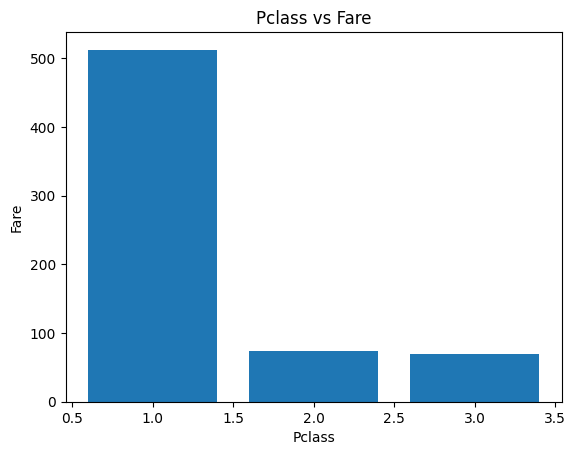

In [ ]:
# Plotting Pclass vs Fare
plt.bar(titanic_encoded2['Pclass'], titanic_encoded2['Fare'])
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.title('Pclass vs Fare')

<Axes: ylabel='Survived'>

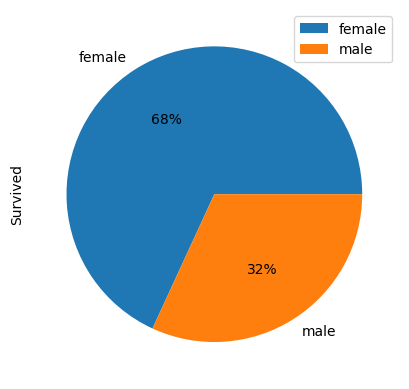

In [ ]:
# Plotting a pie chart for passengers who survived based on sex
titanic_copy.groupby(['Sex']).sum().plot(
    kind='pie', y='Survived', autopct='%1.0f%%')

<Axes: ylabel='Survived'>

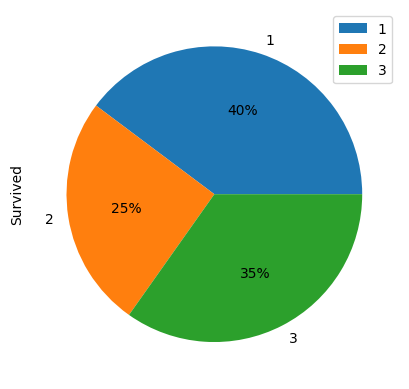

In [ ]:
# Plotting a pie chart for passengers who survived based on their Pclass
titanic_copy.groupby(['Pclass']).sum().plot(
    kind='pie', y='Survived', autopct='%1.0f%%')

<Axes: ylabel='Survived'>

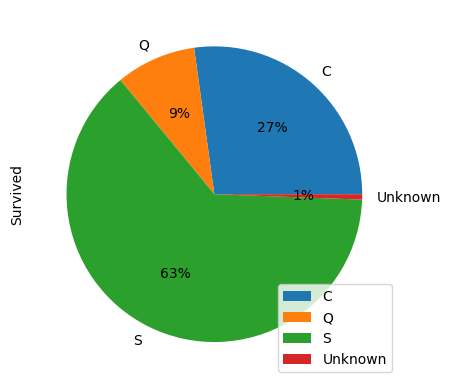

In [ ]:
# Plotting a pie chart for passengers who survived based on where they embarked from
titanic_copy.groupby(['Embarked']).sum().plot(
    kind='pie', y='Survived', autopct='%1.0f%%')

## Step 5: Logistic Regression Analysis


### Perform a logistic regression to predict survival based on selected features.


In [ ]:
# Importing libraries for logistic regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [ ]:
# Displaying column names
list(titanic_encoded2.columns)

['Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [ ]:
# Selected features
features = ['Sex_female', 'Sex_male', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
# Predicting survival based on the selected features
target = 'Survived'

X = titanic_encoded2[features]
y = titanic_encoded2[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
# Accuracy Score
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", confusion_matrix)

# Display feature importance using coefficients

coefficients = model.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
})

print("\n", feature_importance.sort_values(by='Coefficient', ascending=False))

Accuracy: 0.7877094972067039

Confusion Matrix:
 [[88 17]
 [21 53]]

       Feature  Coefficient
0  Sex_female     1.848777
7  Embarked_C     0.612463
8  Embarked_Q     0.207988
9  Embarked_S     0.140386
6        Fare     0.002958
3         Age    -0.009386
5       Parch    -0.097391
4       SibSp    -0.257041
2      Pclass    -0.801823
1    Sex_male    -0.818583


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Selected features
features = ['Sex_female', 'Sex_male', 'Pclass', 'Age','Embarked_C', 'Embarked_Q', 'Embarked_S']
# Predicting survival based on the selected features
target = 'Survived'

X = titanic_encoded2[features]
y = titanic_encoded2[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
# Accuracy Score
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", confusion_matrix)

# Display feature importance using coefficients

coefficients = model.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
})

print("\n", feature_importance.sort_values(by='Coefficient', ascending=False))

Accuracy: 0.7877094972067039

Confusion Matrix:
 [[85 20]
 [18 56]]

       Feature  Coefficient
0  Sex_female     1.273529
4  Embarked_C     0.222729
3         Age    -0.006947
5  Embarked_Q    -0.065465
6  Embarked_S    -0.348124
2      Pclass    -0.920943
1    Sex_male    -1.272783


In [ ]:
# Selected features
features = ['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
# Predicting survival based on the selected features
target = 'Survived'

X = titanic_encoded2[features]
y = titanic_encoded2[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
# Accuracy Score
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", confusion_matrix)

# Display feature importance using coefficients

coefficients = model.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
})

print("\n", feature_importance.sort_values(by='Coefficient', ascending=False))

Accuracy: 0.7821229050279329

Confusion Matrix:
 [[88 17]
 [22 52]]

       Feature  Coefficient
0  Sex_female     1.264679
2  Embarked_C     0.463607
4  Embarked_S    -0.398679
3  Embarked_Q    -0.490792
1    Sex_male    -1.219292


## Step 6: Identify Important Features


### Explanation
* Based on the coefficients from the logistic regression model, identify which features are likely indicators of survival.
* Explain why these features are important and how they relate to the likelihood of survival.

After performing logistic regression, based on the coefficients the feature that seemed a likely indicator of survival was 'Sex_female'. I found that the coefficents for 'Sex_female' was closest to one, indicating a positive result where 'Sex_female' increased the likelihood of surviving. 'Sex_female' had the highest coefficient where Sex_male had the lowest coefficient. This feature is important because a passenger being female makes the odds of survival much higher compared to being male according to the results of the logistic regression. 'Sex_male' was also an important feature with a negative coefficient. Compared to other features it scored the lowest, being close to negative one. This means that a male passenger had a lower chance of surviving compared to a female passengers.